In [1]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
import sklearn

# 1. Data genertaion 

In [2]:
x = np.arange(1, 30, 2, dtype = np.int16)
# dtype = np.int16 : 데이터를 16비트로 저장하겠다
# 2^16개의 서로 다른 값을 나타낼 수 있다. 
# 메모리 사용을 최적화하기 위해, 큰 숫자가 필요 없는 경우에만 사용된다. 

y = 2*x + 1
y_random = y + np.random.normal(0, 8 ,15)
# np.random.normal() : numpy라이브러리에서 제공하는 함수, 정규분포(가우시안 분포)에서 무작위 샘플을 생성하는데 사용.
# np.random.normal(loc = 0, scale = 1, size = 10) 
# loc : 정규 분포의 평균(중심)값이다. 기본값은 0
# scale : 정규분포의 표준편차(분포의 퍼짐 정도). 기본값은 1이며, 반드시 비음수.
# size : 생성할 샘플의 수를 지정. 정수나 튜플 형태로 입력할 수 있으며, 이 값에 따라 반환되는 배열의 형태가 결정된다. 

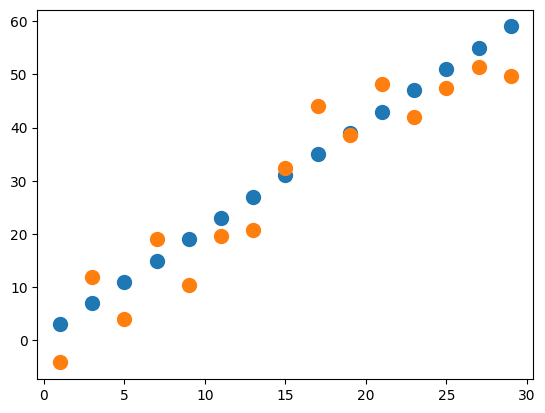

In [4]:
# 그래프 그리기 
plt.plot(x, y, ".", markersize = 20)
# plt.plot : Matplotlib의 plot 함수에서 데이터 포인트를 시각화하는 방식을
# "."  : 마커 스타일로 지정하는 역할
plt.plot(x, y_random, ".", markersize = 20)
plt.show()

# 2. Parameter estimation
파라미터로 계산하는 법


$\beta_1 = \frac{S_{xy}}{S_{xx}}$


$\beta_0 = \overline{y} - \beta_1\overline{x}$

- $\beta_1 $ 
: 회귀선의 기울기를 나타낸다.
: 독립 변수 x의 변화가 종속 변수 y에 미치는 영향을 나타낸다. 

- ${S_{xy}}$

: x와 y의 공분산을 나타낸다.


: 두 변수 간의 선형 관계의 강도를 측정한다. 


: $S_{xy} = \sum{(x_i - \bar{x})(y_i - \bar{y})}$

- ${S_{xx}}$

:x의 분산을 나타낸다.

: x 값들이 평균으로부터 얼마나 퍼져 있는지 나타낸다.

: $ S_{xx} = \sum{(x_i - \bar{x})^2}$


-------------------------------------
- $\beta_0$ 

: 회귀선의 절편을 나타낸다. X = 0일때, y의 예측값을 나타낸다.

- $\overline{y}$

: 종속 변수 y의 평균값. 

- $\overline{x}$

: 종속 변수 x의 평균값. 

- $\beta_0 = \overline{y} - \beta_1\overline{x}$

: 회귀선이 y축을 만나는 지점을 계산하는 방법을 제공한다.

: 즉, x가 O일 때 y의 예상 값을 제공한다. 

In [5]:
Sxy = (x -np.mean(x))*(y_random - np.mean(y_random))
Sxx = (x - np.mean(x))**2

Sxy = Sxy.sum()
Sxx = Sxx.sum()

beta_1 = Sxy/Sxx
beta_0 = np.mean(y_random) - beta_1*np.mean(x)

print("beta_1 = {}".format(beta_1.round(3)))
print("beta_0 = {}".format(beta_0.round(3)))

beta_1 = 1.961
beta_0 = -0.397


In [6]:
y_hat =  1.961*x -0.397
# 예측값 
print(y_hat)

[ 1.564  5.486  9.408 13.33  17.252 21.174 25.096 29.018 32.94  36.862
 40.784 44.706 48.628 52.55  56.472]


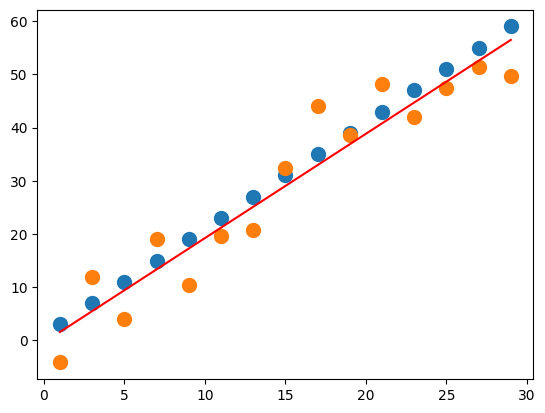

In [7]:
plt.plot(x,y, ".", markersize = 20)
plt.plot(x, y_random, ".", markersize = 20)
plt.plot(x, y_hat, color = "r")
plt.show()

--------------------------------

# 3. sklearn learn package 사용하기 

In [8]:
x_2d = x.reshape(-1,1)
# reshape(-1,1) : -1을 하면 Numpy에게 해당 차원의 크기를 자동으로 계산하도록 지시함.
# 즉, -1을 사용하면 numpy가 배열의 총 원소 수를 기반으로 적절한 크기를 계산한다.
# 1 : 이 값은 배열의 두 번째 차원의 크기를 1로 설정하겠다는 의미. 
# 즉, 각 원소가 하나의 열을 가지는 2D 배열로 변환된다. 
print("Shape = ", x_2d.shape)
print("x = \n", x_2d)

Shape =  (15, 1)
x = 
 [[ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]
 [13]
 [15]
 [17]
 [19]
 [21]
 [23]
 [25]
 [27]
 [29]]


In [9]:
## Regression class instance
lr = LinearRegression()
lr.fit(x_2d, y_random)
print(lr.coef_, lr.intercept_)

[1.96143052] -0.3972081199529036
